# Dataframe Basics

In [108]:
import pandas as pd
import numpy as np

In [2]:
weather_data = {
    'day':['1/1/2021', '1/2/2021', '1/3/2021', '1/4/2021', '1/5/2021', '1/6/2021'],
    'temperature':[32,35,28,24,32,31],
    'windspeed':[6,7,2,7,4,2],
    'event':['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']
}

In [5]:
df = pd.DataFrame(data=weather_data)
df

,day,temperature,windspeed,event
0,1/1/2021,32,6,Rain
1,1/2/2021,35,7,Sunny
2,1/3/2021,28,2,Snow
3,1/4/2021,24,7,Snow
4,1/5/2021,32,4,Rain
5,1/6/2021,31,2,Sunny


In [6]:
df.shape # return a tuple with no of rows and columns

(6, 4)

In [8]:
df.head() # returns inital 5 records/rows

,day,temperature,windspeed,event
0,1/1/2021,32,6,Rain
1,1/2/2021,35,7,Sunny
2,1/3/2021,28,2,Snow
3,1/4/2021,24,7,Snow
4,1/5/2021,32,4,Rain


In [9]:
df.tail() # returns last 5 records/rows

,day,temperature,windspeed,event
1,1/2/2021,35,7,Sunny
2,1/3/2021,28,2,Snow
3,1/4/2021,24,7,Snow
4,1/5/2021,32,4,Rain
5,1/6/2021,31,2,Sunny


In [10]:
df.columns # returns column/feature names

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [11]:
df[2:5] # we can apply slicing operation on DataFrame 

,day,temperature,windspeed,event
2,1/3/2021,28,2,Snow
3,1/4/2021,24,7,Snow
4,1/5/2021,32,4,Rain


In [12]:
df['day'] # returns a Series of data from given dataframe. We can also retrieve multi-coulmns by passing column names as a list

0    1/1/2021
1    1/2/2021
2    1/3/2021
3    1/4/2021
4    1/5/2021
5    1/6/2021
Name: day, dtype: object

In [13]:
type(df.day) # We can also use '.' (dot) operation

pandas.core.series.Series

In [14]:
df[['day', 'event']] # retrieving multi-columns

,day,event
0,1/1/2021,Rain
1,1/2/2021,Sunny
2,1/3/2021,Snow
3,1/4/2021,Snow
4,1/5/2021,Rain
5,1/6/2021,Sunny


In [15]:
df['temperature'].max() # returns maximun value from 'temperature' column

35

In [16]:
df['temperature'].min() # returns minimum value from 'temperature' column

24

In [17]:
df['temperature'].std() # returns Standard Deviation value from 'temperature' column

3.8297084310253524

In [18]:
df['temperature'].mean() # returns mean value for'temperature' column

30.333333333333332

In [19]:
df['temperature'].mode() # returns mode from 'temperature' column

0    32
dtype: int64

In [21]:
df['temperature'].median() # returns median from 'temperature' column

31.5

In [22]:
df.describe() # we can see all statistics related to dataframe for integer value column

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


In [26]:
df[df['temperature']>30] # we can apply conditions to retrieve particular data from given dataframe

,day,temperature,windspeed,event
0,1/1/2021,32,6,Rain
1,1/2/2021,35,7,Sunny
4,1/5/2021,32,4,Rain
5,1/6/2021,31,2,Sunny


In [28]:
df[df['temperature']==df['temperature'].max()] # we can also apply conditions on multi-columns to retrieve the data from given dataframe

,day,temperature,windspeed,event
1,1/2/2021,35,7,Sunny


In [29]:
df['day'][df['temperature']==df['temperature'].max()] # condition needs to be inside a list upon that we can specify the required column

1    1/2/2021
Name: day, dtype: object

In [30]:
df[['day','event']][df['temperature']==df['temperature'].max()] # condition needs to be inside a list upon that we can also specify multi-column

,day,event
1,1/2/2021,Sunny


In [33]:
df.index # returns the index of the given DataFrame

RangeIndex(start=0, stop=6, step=1)

In [34]:
df.set_index('day') # we can set the index of our DataFrame with one of the columns from the dataframe

,temperature,windspeed,event
day,,,
1/1/2021,32,6,Rain
1/2/2021,35,7,Sunny
1/3/2021,28,2,Snow
1/4/2021,24,7,Snow
1/5/2021,32,4,Rain
1/6/2021,31,2,Sunny


In [35]:
df1 = df.set_index('day') # copying the set_index dataframe into df1 object

In [36]:
df1.loc['1/4/2021'] # returns a series of a row which belongs to '1/4/2021'

temperature      24
windspeed         7
event          Snow
Name: 1/4/2021, dtype: object

#! even though if our row index has duplicate values and we want to try to retrieve the data it retrieves all rows satisfying with that index name

# Different ways of creating DataFrame

In [40]:
# we can create DF using list of tuples 

weather_data_tuples = [
    ('1/1/2021', 36, 5, 'Rain'),
    ('1/2/2021', 24, 3, 'Sunny'),
    ('1/3/2021', 31, 2, 'Snow')
]

df_tuples = pd.DataFrame(data=weather_data_tuples)
df_tuples # if we don't specify column names it takes integres as column names by default from 'zero'

,0,1,2,3
0,1/1/2021,36,5,Rain
1,1/2/2021,24,3,Sunny
2,1/3/2021,31,2,Snow


In [41]:
df_tuples = pd.DataFrame(data=weather_data_tuples, columns=['day', 'temperature', 'windspeed', 'event'])
df_tuples

,day,temperature,windspeed,event
0,1/1/2021,36,5,Rain
1,1/2/2021,24,3,Sunny
2,1/3/2021,31,2,Snow


In [43]:
# we can also create DF using list of dicts

weather_data_dicts = [
    {'day':'1/1/2021', 'temperature':36, 'windspeed':5, 'event':'Rain'},
    {'day':'1/2/2021', 'temperature':24, 'windspeed':3, 'event':'Sunny'},
    {'day':'1/3/2021', 'temperature':31, 'windspeed':2, 'event':'Snow'}
]

df_dicts = pd.DataFrame(data=weather_data_dicts)
df_dicts

,day,temperature,windspeed,event
0,1/1/2021,36,5,Rain
1,1/2/2021,24,3,Sunny
2,1/3/2021,31,2,Snow


# Read, Write CSV, Excel file

In [45]:
df = pd.read_csv('stock_data.csv')
df # it reads whole csv file into a DF

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,85,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [46]:
# if we have to read_csv by skipping rows from csv sheet we need to mention 'skiprows' while reading it
df = pd.read_csv('stock_data.csv', skiprows=0) # as of now I am not skipping and using zero as row_num to skip
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,85,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [48]:
# else we can use any row as a header of our DF by mentioning the 'header' argumnet while reading any csv
df = pd.read_csv('stock_data.csv', header=0) #I am reading row 0 from csv as a header
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,85,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [49]:
# if we don't have any header in our given csv and we too want to read directly without any header then use 'header=None'
df = pd.read_csv('stock_data.csv', header=None)
df

,0,1,2,3,4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,85,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [50]:
# if we want to keep some names as columns then we need to give the 'names' explicitly 
df = pd.read_csv('stock_data.csv', header=None, names=['TICKERS', 'EPS', 'REVENUE', 'PRICE', 'PEOPLE'])
df

,TICKERS,EPS,REVENUE,PRICE,PEOPLE
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,85,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [52]:
# if we want to read only few rows from given csv then use 'nrows'
df = pd.read_csv('stock_data.csv', nrows=3)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,85,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1.00,85,64,bill gates


In [53]:
# if we want any inconsistent values as NaN then use 'na_values'
df = pd.read_csv('stock_data.csv', na_values=['not available', 'n.a.'])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,85.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


In [60]:
# if we supply inconsistent values as a list to 'na_values' then all values in the list are replaced as NaN irrespective of columns
# if we want to make inconsistent values to NaN to only specific columns then we need to pass them as a dcit
df = pd.read_csv('stock_data.csv', na_values={
        'eps':['not available'],
        'revenue':[-1],
        'price':['n.a.'],
        'people':['n.a.']
    })
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,85.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


In [61]:
# if we want to write any DF CSV
# df.to_csv('filename.csv') # default it add rows index from 'zero'
# df.to_csv('filename.csv', index=False) # it won't add default row index
# df.to_csv('filename.csv', columns=['tickers', 'eps']) # exports only specified columns
# df.to_csv('filename.csv', header=False) # skips header while exporting into csv

In [66]:
def convert_people_cell(cell):
    if cell=='n.a.':
        return 'VINAY'
    return cell

def convert_eps_cell(cell):
    if cell=='not available':
        return None
    return cell
    
df = pd.read_csv('stock_data.csv', converters={
        'people': convert_people_cell,
        'eps': convert_eps_cell
    }) # it applies for read_excel also
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,85,larry page
1,WMT,4.61,484,65,VINAY
2,MSFT,-1,85,64,bill gates
3,RIL,None,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [67]:
# if we want to write any DF Excel
# df.to_excel('filename.xlsx', sheet_name='stocks') # default it add rows index from 'zero'
# df.to_excel('filename.xlsx', sheet_name='stocks', index=False) # it won't add default row index
# df.to_excel('filename.xlsx', sheet_name='stocks', columns=['tickers', 'eps']) # exports only specified columns
# df.to_excel('filename.xlsx', sheet_name='stocks', header=False) # skips header while exporting into csv
# df.to_excel('filename.xlsx', sheet_name='stocks', startrow=1, startcol=2) # starts writing from specified (row,col)

In [71]:
# conda install openpyxl
# pip install openpyxl

In [72]:
# Writing two DF's into Excel workbook in to two different sheets
# We can use 'ExcelWriter'

df_weather = pd.DataFrame({
    'day':['1/1/2021', '1/2/2021', '1/3/2021', '1/4/2021', '1/5/2021', '1/6/2021'],
    'temperature':[32,35,28,24,32,31],
    'windspeed':[6,7,2,7,4,2],
    'event':['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']
})

df_stocks = pd.DataFrame({
    'tickers':['GOOGL', 'MSFT', 'RIL'],
    'eps':[27.82, -1, 'not available'],
    'people':['larry page', 'bill gates', 'mukesh ambani']
})


with pd.ExcelWriter('stocks_and_weather.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name='stocks', index=False)
    df_weather.to_excel(writer, sheet_name='weather', index=False, startrow=1, startcol=2)

# Handling Missing Data: fillna, dropna, interpolate

In [76]:
df = pd.read_csv('weather_data.csv')
df

,day,temperature,windspeed,event
0,01-01-2021,32.0,6.0,Rain
1,02-01-2021,NaN,9.0,Sunny
2,03-01-2021,28.0,NaN,Snow
3,04-01-2021,NaN,7.0,NaN
4,05-01-2021,32.0,NaN,Rain
5,06-01-2021,NaN,NaN,Sunny
6,07-01-2021,NaN,NaN,NaN
7,08-01-2021,34.0,8.0,Cloudy
8,09-01-2021,40.0,12.0,Sunny


In [77]:
type(df.day[0]) # not a date-time object it reads as str object while reading from csc to DF

str

In [81]:
# if we want to read date fields as date-time objects instead str then use 'parse_dates' arg on list of columns
df = pd.read_csv('weather_data.csv', parse_dates=['day'])
print(type(df.day[0])) # returns pandas timestamp 
df

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,day,temperature,windspeed,event
0,2021-01-01,32.0,6.0,Rain
1,2021-02-01,NaN,9.0,Sunny
2,2021-03-01,28.0,NaN,Snow
3,2021-04-01,NaN,7.0,NaN
4,2021-05-01,32.0,NaN,Rain
5,2021-06-01,NaN,NaN,Sunny
6,2021-07-01,NaN,NaN,NaN
7,2021-08-01,34.0,8.0,Cloudy
8,2021-09-01,40.0,12.0,Sunny


In [82]:
new_df = df.fillna(0) # it fills all NaN values in given DF to value 'zero'
new_df

,day,temperature,windspeed,event
0,2021-01-01,32.0,6.0,Rain
1,2021-02-01,0.0,9.0,Sunny
2,2021-03-01,28.0,0.0,Snow
3,2021-04-01,0.0,7.0,0
4,2021-05-01,32.0,0.0,Rain
5,2021-06-01,0.0,0.0,Sunny
6,2021-07-01,0.0,0.0,0
7,2021-08-01,34.0,8.0,Cloudy
8,2021-09-01,40.0,12.0,Sunny


In [83]:
new_df = df.fillna({
        'temperature':0,
        'windspeed':0,
        'event':'no event'
    })
new_df

,day,temperature,windspeed,event
0,2021-01-01,32.0,6.0,Rain
1,2021-02-01,0.0,9.0,Sunny
2,2021-03-01,28.0,0.0,Snow
3,2021-04-01,0.0,7.0,no event
4,2021-05-01,32.0,0.0,Rain
5,2021-06-01,0.0,0.0,Sunny
6,2021-07-01,0.0,0.0,no event
7,2021-08-01,34.0,8.0,Cloudy
8,2021-09-01,40.0,12.0,Sunny


In [84]:
# If we want to carry forward a value instead filling NaN with zeroes then using 'method=ffil'
new_df = df.fillna(method='ffill')
new_df

,day,temperature,windspeed,event
0,2021-01-01,32.0,6.0,Rain
1,2021-02-01,32.0,9.0,Sunny
2,2021-03-01,28.0,9.0,Snow
3,2021-04-01,28.0,7.0,Snow
4,2021-05-01,32.0,7.0,Rain
5,2021-06-01,32.0,7.0,Sunny
6,2021-07-01,32.0,7.0,Sunny
7,2021-08-01,34.0,8.0,Cloudy
8,2021-09-01,40.0,12.0,Sunny


In [85]:
# similarly if we want to carry back a value instead filling NaN with zeroes then using 'method=bfil'
new_df = df.fillna(method='bfill')
new_df

,day,temperature,windspeed,event
0,2021-01-01,32.0,6.0,Rain
1,2021-02-01,28.0,9.0,Sunny
2,2021-03-01,28.0,7.0,Snow
3,2021-04-01,32.0,7.0,Rain
4,2021-05-01,32.0,8.0,Rain
5,2021-06-01,34.0,8.0,Sunny
6,2021-07-01,34.0,8.0,Cloudy
7,2021-08-01,34.0,8.0,Cloudy
8,2021-09-01,40.0,12.0,Sunny


In [86]:
# If we want fill carry forward/backward by row wise then we use 'axis'
new_df = df.fillna(method='ffill', axis='columns')
new_df

,day,temperature,windspeed,event
0,2021-01-01,32,6,Rain
1,2021-02-01,2021-02-01 00:00:00,9,Sunny
2,2021-03-01,28,28,Snow
3,2021-04-01,2021-04-01 00:00:00,7,7
4,2021-05-01,32,32,Rain
5,2021-06-01,2021-06-01 00:00:00,2021-06-01 00:00:00,Sunny
6,2021-07-01,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00
7,2021-08-01,34,8,Cloudy
8,2021-09-01,40,12,Sunny


In [87]:
# If we want fill carry forward/backward into only one cell then use 'limit' argument
new_df = df.fillna(method='ffill', limit=1)
new_df

,day,temperature,windspeed,event
0,2021-01-01,32.0,6.0,Rain
1,2021-02-01,32.0,9.0,Sunny
2,2021-03-01,28.0,9.0,Snow
3,2021-04-01,28.0,7.0,Snow
4,2021-05-01,32.0,7.0,Rain
5,2021-06-01,32.0,NaN,Sunny
6,2021-07-01,NaN,NaN,Sunny
7,2021-08-01,34.0,8.0,Cloudy
8,2021-09-01,40.0,12.0,Sunny


In [88]:
# if we want to fill our missing values in a better guess like 'linear' way then we can go with 'interpolate' on DF
new_df = df.interpolate() # default method='linear'
new_df

,day,temperature,windspeed,event
0,2021-01-01,32.000000,6.00,Rain
1,2021-02-01,30.000000,9.00,Sunny
2,2021-03-01,28.000000,8.00,Snow
3,2021-04-01,30.000000,7.00,NaN
4,2021-05-01,32.000000,7.25,Rain
5,2021-06-01,32.666667,7.50,Sunny
6,2021-07-01,33.333333,7.75,NaN
7,2021-08-01,34.000000,8.00,Cloudy
8,2021-09-01,40.000000,12.00,Sunny


In [90]:
# we can use interpolate(method='linear') default argument. Other values are 'quadratic', 'cubic' 'slinear', 'polynomial' etc.,
new_df = df.interpolate(method='cubic')
new_df

,day,temperature,windspeed,event
0,2021-01-01,32.000000,6.000000,Rain
1,2021-02-01,27.890625,9.000000,Sunny
2,2021-03-01,28.000000,8.685065,Snow
3,2021-04-01,30.109375,7.000000,NaN
4,2021-05-01,32.000000,5.616883,Rain
5,2021-06-01,32.187500,5.116883,Sunny
6,2021-07-01,32.125000,5.808442,NaN
7,2021-08-01,34.000000,8.000000,Cloudy
8,2021-09-01,40.000000,12.000000,Sunny


In [91]:
# if we want to drop a NaN value rows then
new_df = df.dropna()
new_df

,day,temperature,windspeed,event
0,2021-01-01,32.0,6.0,Rain
7,2021-08-01,34.0,8.0,Cloudy
8,2021-09-01,40.0,12.0,Sunny


In [93]:
# if we want to drop a row only if all values are NaN
new_df = df.set_index('day')
new_df = new_df.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2021-01-01,32.0,6.0,Rain
2021-02-01,NaN,9.0,Sunny
2021-03-01,28.0,NaN,Snow
2021-04-01,NaN,7.0,NaN
2021-05-01,32.0,NaN,Rain
2021-06-01,NaN,NaN,Sunny
2021-08-01,34.0,8.0,Cloudy
2021-09-01,40.0,12.0,Sunny


In [94]:
# if I want to keep rows which are havig valid values other than NaN/empty we can use 'thresh' 
# (checks how many valid values exists in a row) if cond. meets it keeps the row otherwise it drops the row.
new_df = df.set_index('day')
new_df = new_df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
2021-01-01,32.0,6.0,Rain
2021-02-01,NaN,9.0,Sunny
2021-03-01,28.0,NaN,Snow
2021-05-01,32.0,NaN,Rain
2021-08-01,34.0,8.0,Cloudy
2021-09-01,40.0,12.0,Sunny


In [102]:
df1 = df
df1['day'][1] = '2021-03-01 00:00:00'
df1['day'][3] = '2021-06-01 00:00:00'
df1.set_index('day') # now days are not in a sequential order

d:\anaconda3\envs\mypython36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\anaconda3\envs\mypython36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temperature,windspeed,event
day,,,
2021-01-01 00:00:00,32.0,6.0,Rain
2021-03-01 00:00:00,NaN,9.0,Sunny
2021-03-01 00:00:00,28.0,NaN,Snow
2021-06-01 00:00:00,NaN,7.0,NaN
2021-05-01 00:00:00,32.0,NaN,Rain
2021-06-01 00:00:00,NaN,NaN,Sunny
2021-07-01 00:00:00,NaN,NaN,NaN
2021-08-01 00:00:00,34.0,8.0,Cloudy
2021-09-01 00:00:00,40.0,12.0,Sunny


In [104]:
# to make them in a sequential order we can use 'pd.date_range'
dt = pd.date_range('01-01-2021', '01-09-2021')
idx = pd.DatetimeIndex(dt)
df1.reindex(idx)

,day,temperature,windspeed,event
2021-01-01,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN,NaN
2021-01-09,NaN,NaN,NaN,NaN


# Missing Data: Replace function

In [107]:
df = pd.read_csv('weather_data_replace.csv')
df

,day,temperature,windspeed,event
0,01-01-2021,32,6,Rain
1,02-01-2021,-99999,9,Sunny
2,03-01-2021,28,-99999,Snow
3,04-01-2021,-99999,7,No Event
4,05-01-2021,32,-99999,Rain
5,06-01-2021,31,2,Sunny
6,06-01-2021,34,5,No Event


In [110]:
new_df = df.replace(-99999, np.NaN)
new_df

,day,temperature,windspeed,event
0,01-01-2021,32.0,6.0,Rain
1,02-01-2021,NaN,9.0,Sunny
2,03-01-2021,28.0,NaN,Snow
3,04-01-2021,NaN,7.0,No Event
4,05-01-2021,32.0,NaN,Rain
5,06-01-2021,31.0,2.0,Sunny
6,06-01-2021,34.0,5.0,No Event


In [117]:
df1 = df
df1.iloc[4]['windspeed'] # returns single cell value
df1.at[4, 'windspeed'] = -8888 # changes/updates the single cell value 
df1

,day,temperature,windspeed,event
0,01-01-2021,32,6,Rain
1,02-01-2021,-99999,9,Sunny
2,03-01-2021,28,-99999,Snow
3,04-01-2021,-99999,7,No Event
4,05-01-2021,32,-8888,Rain
5,06-01-2021,31,2,Sunny
6,06-01-2021,34,5,No Event


In [118]:
# if we want to replace multi values [-99999, -8888] as NaN in a given DF then
new_df = df1.replace([-99999, -8888], np.NaN)
new_df

,day,temperature,windspeed,event
0,01-01-2021,32.0,6.0,Rain
1,02-01-2021,NaN,9.0,Sunny
2,03-01-2021,28.0,NaN,Snow
3,04-01-2021,NaN,7.0,No Event
4,05-01-2021,32.0,NaN,Rain
5,06-01-2021,31.0,2.0,Sunny
6,06-01-2021,34.0,5.0,No Event


In [121]:
new_df = df1.replace([-99999, -8888], [11111,2222])
new_df

,day,temperature,windspeed,event
0,01-01-2021,32,6,Rain
1,02-01-2021,11111,9,Sunny
2,03-01-2021,28,11111,Snow
3,04-01-2021,11111,7,No Event
4,05-01-2021,32,2222,Rain
5,06-01-2021,31,2,Sunny
6,06-01-2021,34,5,No Event


In [119]:
# if we want to replace values columnn wise as NaN in a given DF then use dict
new_df = df1.replace({
        'temperature':-99999,
        'windspeed' : [-99999, -8888],
        'event':'No Event'
    }, np.NaN)

new_df

,day,temperature,windspeed,event
0,01-01-2021,32.0,6.0,Rain
1,02-01-2021,NaN,9.0,Sunny
2,03-01-2021,28.0,NaN,Snow
3,04-01-2021,NaN,7.0,NaN
4,05-01-2021,32.0,NaN,Rain
5,06-01-2021,31.0,2.0,Sunny
6,06-01-2021,34.0,5.0,NaN


In [120]:
# we can replace directly by the values
new_df = df1.replace({
        -99999: np.NaN,
        -8888: 0,
        'No Event':'WINDY'
    })
new_df

,day,temperature,windspeed,event
0,01-01-2021,32.0,6.0,Rain
1,02-01-2021,NaN,9.0,Sunny
2,03-01-2021,28.0,NaN,Snow
3,04-01-2021,NaN,7.0,WINDY
4,05-01-2021,32.0,0.0,Rain
5,06-01-2021,31.0,2.0,Sunny
6,06-01-2021,34.0,5.0,WINDY


In [122]:
# We can also use regex expression in replcae by column-wise passing dict

# Groupby (Split, Apply, Combine)

In [126]:
df = pd.read_csv('weather_by_city.csv')
df

,day,city,temperature,windspeed,event
0,01-01-2021,new york,32,6,Rain
1,02-01-2021,new york,36,7,Sunny
2,03-01-2021,new york,28,12,Snow
3,04-01-2021,new york,33,7,Sunny
4,01-01-2021,mumbai,90,5,Sunny
5,02-01-2021,mumbai,85,12,Fog
6,03-01-2021,mumbai,87,15,Fog
7,04-01-2021,mumbai,92,5,Rain
8,01-01-2021,paris,45,20,Sunny
9,02-01-2021,paris,50,13,Cloudy


In [127]:
g = df.groupby('city')
g # return DataFrameGroupBy object need to iterator

In [132]:
for city, city_df in g:
    print(city)
    print(city_df)

mumbai
          day    city  temperature  windspeed  event
4  01-01-2021  mumbai           90          5  Sunny
5  02-01-2021  mumbai           85         12    Fog
6  03-01-2021  mumbai           87         15    Fog
7  04-01-2021  mumbai           92          5   Rain
new york
          day      city  temperature  windspeed  event
0  01-01-2021  new york           32          6   Rain
1  02-01-2021  new york           36          7  Sunny
2  03-01-2021  new york           28         12   Snow
3  04-01-2021  new york           33          7  Sunny
paris
           day   city  temperature  windspeed   event
8   01-01-2021  paris           45         20   Sunny
9   02-01-2021  paris           50         13  Cloudy
10  03-01-2021  paris           54          8  Cloudy
11  04-01-2021  paris           42         10  Cloudy


In [134]:
g.get_group('mumbai') 

,day,city,temperature,windspeed,event
4,01-01-2021,mumbai,90,5,Sunny
5,02-01-2021,mumbai,85,12,Fog
6,03-01-2021,mumbai,87,15,Fog
7,04-01-2021,mumbai,92,5,Rain


In [135]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,04-01-2021,92,15,Sunny
new york,04-01-2021,36,12,Sunny
paris,04-01-2021,54,20,Sunny


In [137]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

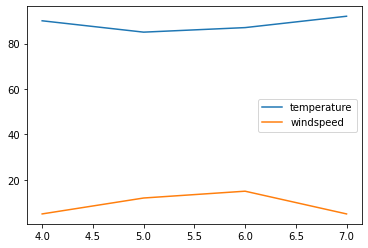

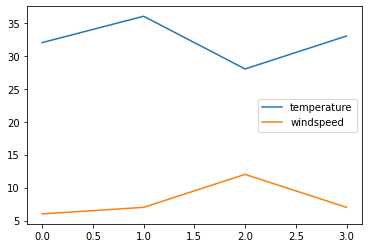

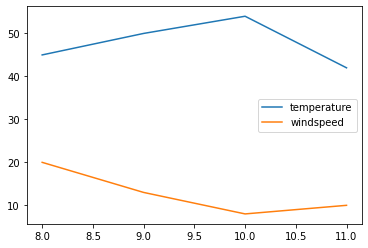

In [138]:
%matplotlib inline
g.plot()

# Concat DataFrames

In [141]:
india_weather = pd.DataFrame({
    'city':['mumbai', 'delhi', 'banglore'],
    'temperature':[32,45,30],
    'humidity':[80,60,78]
})

usa_weather = pd.DataFrame({
    'city':['NY', 'Dallas', 'Connecticut'],
    'temperature':[21,14,35],
    'humidity':[55,65,75]
})

print(india_weather)
print(usa_weather)

       city  temperature  humidity
0    mumbai           32        80
1     delhi           45        60
2  banglore           30        78
          city  temperature  humidity
0           NY           21        55
1       Dallas           14        65
2  Connecticut           35        75


In [142]:
df = pd.concat([india_weather, usa_weather]) # it concatenates two DFs but index won't continue
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,NY,21,55
1,Dallas,14,65
2,Connecticut,35,75


In [143]:
df = pd.concat([india_weather, usa_weather], ignore_index=True) # it concatenates two DFs but with continuous index
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,NY,21,55
4,Dallas,14,65
5,Connecticut,35,75


In [145]:
# it concatenates two DFs with keys. Doesn't work along with 'ignore_index'
df = pd.concat([india_weather, usa_weather], keys=['IND', "USA"]) 
df

city  temperature  humidity
IND 0       mumbai           32        80
    1        delhi           45        60
    2     banglore           30        78
USA 0           NY           21        55
    1       Dallas           14        65
    2  Connecticut           35        75

In [150]:
df.loc['IND'] # returns rows related to 'IND'

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [152]:
temperature_df = pd.DataFrame({
    'city':['mumbai', 'delhi', 'banglore'],
    'temperature':[32,45,30]
})

windspeed_df = pd.DataFrame({
    'city':['mumbai', 'delhi', 'banglore'],
    'windspeed':[15,25,35]
})

In [153]:
df = pd.concat([temperature_df, windspeed_df]) # it concatenates to the rows
df

,city,temperature,windspeed
0,mumbai,32.0,NaN
1,delhi,45.0,NaN
2,banglore,30.0,NaN
0,mumbai,NaN,15.0
1,delhi,NaN,25.0
2,banglore,NaN,35.0


In [154]:
# if we wants to concatenates along with columns use 'axis' argument
df = pd.concat([temperature_df, windspeed_df], axis=1) 
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,15
1,delhi,45,delhi,25
2,banglore,30,banglore,35


In [159]:
temperature_df = pd.DataFrame({
    'city':['mumbai', 'delhi', 'banglore'],
    'temperature':[32,45,30]
})

windspeed_df = pd.DataFrame({
    'city':['delhi', 'mumbai'],
    'windspeed':[25,15]
})

In [160]:
# if we wants to concatenates along with columns use 'axis' argument
df = pd.concat([temperature_df, windspeed_df], axis=1) 
# wrongly concatenated it concatenates based on index
df

,city,temperature,city,windspeed
0,mumbai,32,delhi,25.0
1,delhi,45,mumbai,15.0
2,banglore,30,NaN,NaN


In [161]:
temperature_df = pd.DataFrame({
    'city':['mumbai', 'delhi', 'banglore'],
    'temperature':[32,45,30]
}, index=[0,1,2])

windspeed_df = pd.DataFrame({
    'city':['delhi', 'mumbai'],
    'windspeed':[25,15]
}, index=[1,0])

In [162]:
# while concatenates along with columns use 'axis' argument and be carefuel with INDEXes of DFs
# we can have 'merge' to avoid INDEX conflict while concatenating two or more DFs
df = pd.concat([temperature_df, windspeed_df], axis=1) 
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,15.0
1,delhi,45,delhi,25.0
2,banglore,30,NaN,NaN


In [163]:
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [166]:
event_series = pd.Series(['Rain', 'Snow', 'Sunny'], name='event')
event_series

0     Rain
1     Snow
2    Sunny
Name: event, dtype: object

In [168]:
df = pd.concat([temperature_df, event_series], axis=1)
df

,city,temperature,event
0,mumbai,32,Rain
1,delhi,45,Snow
2,banglore,30,Sunny


# Merge DataFrames

In [173]:
df1 = pd.DataFrame({
    'city':['NY', 'Dallas', 'Connecticut'],
    'temperature':[21,14,35]
})

df2 = pd.DataFrame({
    'city':['Chicago', 'NY', 'Connecticut'],
    'windspeed':[11,22,33]
})

In [174]:
df = pd.merge(df1, df2, on='city') # default it consider inner join (intersection from two DFs)
df

,city,temperature,windspeed
0,NY,21,22
1,Connecticut,35,33


In [175]:
df = pd.merge(df1, df2, on='city', how='outer') # outer join (union from two DFs)
df

,city,temperature,windspeed
0,NY,21.0,22.0
1,Dallas,14.0,NaN
2,Connecticut,35.0,33.0
3,Chicago,NaN,11.0


In [176]:
df = pd.merge(df1, df2, on='city', how='left') # left join (returns all values from first DF)
df

,city,temperature,windspeed
0,NY,21,22.0
1,Dallas,14,NaN
2,Connecticut,35,33.0


In [177]:
df = pd.merge(df1, df2, on='city', how='right') # right join (returns all values from second DF)
df

,city,temperature,windspeed
0,NY,21.0,22
1,Connecticut,35.0,33
2,Chicago,NaN,11


In [178]:
# 'indicator' argument says that what kind of merge happened between two given DFs
df = pd.merge(df1, df2, on='city', how='outer', indicator=True)
df

,city,temperature,windspeed,_merge
0,NY,21.0,22.0,both
1,Dallas,14.0,NaN,left_only
2,Connecticut,35.0,33.0,both
3,Chicago,NaN,11.0,right_only


# pivot table

In [179]:
df = pd.read_csv('weather_by_city.csv')
df

,day,city,temperature,windspeed,event
0,01-01-2021,new york,32,6,Rain
1,02-01-2021,new york,36,7,Sunny
2,03-01-2021,new york,28,12,Snow
3,04-01-2021,new york,33,7,Sunny
4,01-01-2021,mumbai,90,5,Sunny
5,02-01-2021,mumbai,85,12,Fog
6,03-01-2021,mumbai,87,15,Fog
7,04-01-2021,mumbai,92,5,Rain
8,01-01-2021,paris,45,20,Sunny
9,02-01-2021,paris,50,13,Cloudy


In [180]:
df.pivot(index='day', columns='city')

temperature                windspeed                 event  \
city            mumbai new york paris    mumbai new york paris mumbai   
day                                                                     
01-01-2021          90       32    45         5        6    20  Sunny   
02-01-2021          85       36    50        12        7    13    Fog   
03-01-2021          87       28    54        15       12     8    Fog   
04-01-2021          92       33    42         5        7    10   Rain   

                             
city       new york   paris  
day                          
01-01-2021     Rain   Sunny  
02-01-2021    Sunny  Cloudy  
03-01-2021     Snow  Cloudy  
04-01-2021    Sunny  Cloudy

In [181]:
df.pivot(index='day', columns='city', values='event')

city,mumbai,new york,paris
day,,,
01-01-2021,Sunny,Rain,Sunny
02-01-2021,Fog,Sunny,Cloudy
03-01-2021,Fog,Snow,Cloudy
04-01-2021,Rain,Sunny,Cloudy
